In [7]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from .txt format (assuming it's tab-separated or comma-separated)
file_path = '../data/MachineLearningRating_v3.txt'

df = pd.read_csv(file_path, sep='|')



C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\2392206408.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


In [2]:
# 1. Data Summarization:
## Descriptive Statistics
print("Descriptive Statistics:")
numerical_columns = ['TotalPremium', 'TotalClaims']
print(df[numerical_columns].describe())

# Variability (Standard deviation) for numerical features
print("\nVariability (Standard Deviation):")
print(df[numerical_columns].std())


Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability (Standard Deviation):
TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


In [3]:
# Importing required libraries
import pandas as pd
import numpy as np

# Load the data from .txt format (assuming it's tab-separated or comma-separated)
file_path = '../data/MachineLearningRating_v3.txt'

# Load the data
df = pd.read_csv(file_path, sep='|')

# Inspect the first few rows of 'TransactionMonth' and 'VehicleIntroDate' to understand their format
print("TransactionMonth sample:\n", df['TransactionMonth'].head())
print("VehicleIntroDate sample:\n", df['VehicleIntroDate'].head())

# Attempt to convert date columns to appropriate formats
# Adjust format based on the actual format of your data
try:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m', errors='coerce')
except Exception as e:
    print(f"Error converting 'TransactionMonth': {e}")

try:
    df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
except Exception as e:
    print(f"Error converting 'VehicleIntroDate': {e}")

# Descriptive Statistics: Calculating Variability for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_cols].describe()

# Variability metrics
variability = df[numeric_cols].agg(['std', 'var', lambda x: x.max() - x.min()])

# Rename the last row to 'range'
variability.index = ['std', 'var', 'range']

print("Descriptive Statistics:\n", descriptive_stats)
print("\nVariability (Standard Deviation, Variance, Range):\n", variability)

# Check data structure: dtypes of each column
dtypes_info = df.dtypes

print("\nData Structure (Dtypes):\n", dtypes_info)

# Check if categorical columns are properly formatted
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical Columns:\n", categorical_cols)

# Convert specific columns to categorical dtype
categorical_cols_to_convert = [
    'Citizenship', 'LegalType', 'Title', 'Language',
    'Bank', 'AccountType', 'MaritalStatus', 'Gender',
    'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
    'bodytype', 'CoverCategory', 'CoverType', 'CoverGroup',
    'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

# Ensure that the columns exist before converting
for col in categorical_cols_to_convert:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Confirm dtype after conversion
print("\nUpdated Data Structure (Dtypes after conversion):\n", df.dtypes)


C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1398786473.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


TransactionMonth sample:
 0    2015-03-01 00:00:00
1    2015-05-01 00:00:00
2    2015-07-01 00:00:00
3    2015-05-01 00:00:00
4    2015-07-01 00:00:00
Name: TransactionMonth, dtype: object
VehicleIntroDate sample:
 0    6/2002
1    6/2002
2    6/2002
3    6/2002
4    6/2002
Name: VehicleIntroDate, dtype: object


C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1398786473.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values Summary:\n", missing_values)

Missing Values Summary:
 TransactionMonth           1000098
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


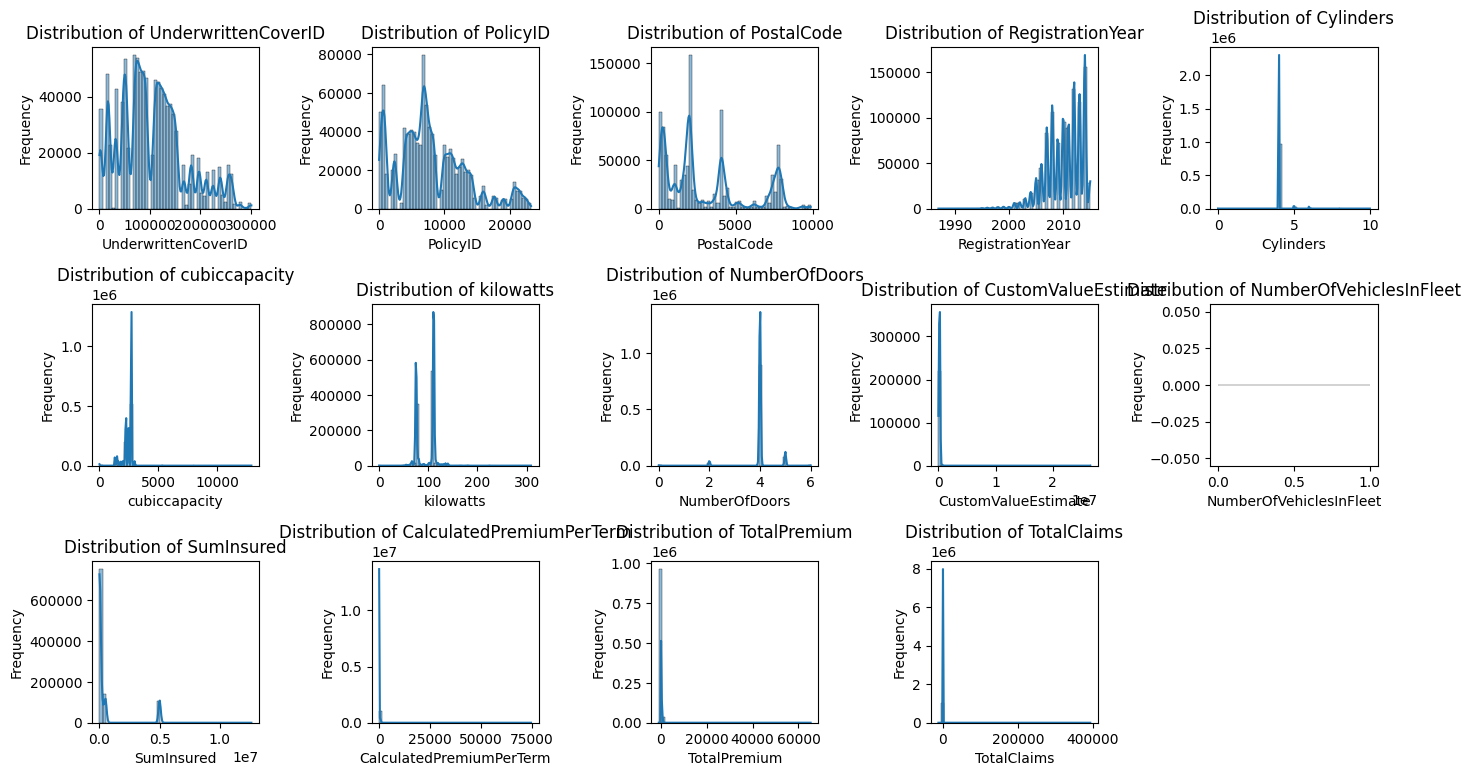

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 5, i)  # Adjust the number of rows and columns according to your data
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns

# Determine the number of rows and columns needed
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Adds enough rows to fit all columns

# Create a figure with the appropriate size
plt.figure(figsize=(14, num_rows * 5))  # Adjust height as needed

# Plot each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, 4, i)  # Adjust rows and columns based on the number of categorical columns
    sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:

# Scatter plot for TotalPremium vs TotalClaims using Province as the hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by Province')
plt.show()

# Correlation matrix for numerical variables (TotalPremium and TotalClaims)
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of TotalPremium and TotalClaims')
plt.show()

# Correlation matrix for TotalPremium and TotalClaims
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of insurance cover type by province
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='CoverType', hue='Province', order=df['CoverType'].value_counts().index)
plt.title('Distribution of Insurance Cover Types Across Provinces')
plt.xlabel('Count')
plt.ylabel('Cover Type')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





plt.figure(figsize=(14, 8))
sns.boxplot(x='make', y='CalculatedPremiumPerTerm', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Premium Distribution by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Calculated Premium Per Term')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Data Comparison: Trends Over Geography

# Compare average TotalPremium by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=df, estimator='mean', palette='viridis')
plt.title('Average TotalPremium by Province')
plt.xticks(rotation=45)
plt.show()

# Compare average Count of Auto Makes by Province
auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Count', hue='make', data=auto_make_count, palette='Set2')
plt.title('Auto Make Count by Province')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Grouping by Province and summing the counts of each make
auto_make_count = df.groupby(['Province', 'make']).size().reset_index(name='Count')

# Pivot the table to get data in a more suitable format for a stacked bar chart
auto_make_pivot = auto_make_count.pivot(index='Province', columns='make', values='Count').fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
auto_make_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='Set2')

# Customizing the plot
plt.title('Auto Make Count by Province', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Province', fontsize=12)

# Adding legend and labels
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# 2. Outlier Detection: Box Plots

# Box plot for TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalPremium', data=df, color='lightcoral')
plt.title('Box Plot of TotalPremium')
plt.show()

# Box plot for TotalClaims
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalClaims', data=df, color='lightblue')
plt.title('Box Plot of TotalClaims')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='CalculatedPremiumPerTerm', index='make', columns='Province', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Insurance Premiums by Vehicle Make and Region')
plt.xlabel('Province')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g = sns.FacetGrid(df, col="VehicleType", col_wrap=4, height=4, sharex=False, sharey=True)
g.map(sns.histplot, "CalculatedPremiumPerTerm", bins=30, kde=True, color="blue")
g.set_axis_labels('Premium', 'Frequency')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.suptitle('Distribution of Insurance Premiums by Vehicle Type', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='CoverType', y='TotalClaims', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Total Claims by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Total Claims')
plt.tight_layout()
plt.show()

task-3

In [9]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [6]:
from scipy.stats import f_oneway

# Grouping data by Province and calculating mean claims
grouped_by_province = df.groupby('Province')['TotalClaims']

# One-way ANOVA test
anova_result = f_oneway(*[group for _, group in grouped_by_province])
print("ANOVA test for risk differences across provinces: ", anova_result)

ANOVA test for risk differences across provinces:  F_onewayResult(statistic=np.float64(5.84941376240761), pvalue=np.float64(1.6782057588675903e-07))


C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\2084231876.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_province = df.groupby('Province')['TotalClaims']


In [10]:
# Grouping data by PostalCode
grouped_by_postal = df.groupby('PostalCode')['TotalClaims']

# ANOVA test for multiple postal codes
anova_result_postal = f_oneway(*[group for _, group in grouped_by_postal])

# Output the ANOVA results
print("ANOVA Result for TotalClaims across PostalCodes:")
print(anova_result_postal)


ANOVA Result for TotalClaims across PostalCodes:
F_onewayResult(statistic=np.float64(0.9419762214391832), pvalue=np.float64(0.8906511279164051))


In [11]:
import scipy.stats as stats

# Define the KPI: Risk (TotalClaims) and Margin (TotalPremium - TotalClaims)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# 1. Hypothesis: No Risk Differences Across Provinces
group_a_province = df[df['Province'] == 'A']['TotalClaims']  # Replace 'A' with a province
group_b_province = df[df['Province'] == 'B']['TotalClaims']  # Replace 'B' with another province

# Check for normality
shapiro_a = stats.shapiro(group_a_province)
shapiro_b = stats.shapiro(group_b_province)

# Perform t-test or Mann-Whitney U test based on normality
if shapiro_a.pvalue > 0.05 and shapiro_b.pvalue > 0.05:
    t_stat, p_value = stats.ttest_ind(group_a_province, group_b_province)
else:
    u_stat, p_value = stats.mannwhitneyu(group_a_province, group_b_province)

# Interpretation
print(f"Risk Differences Across Provinces - p-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences across provinces.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences across provinces.")

# 2. Hypothesis: No Risk Differences Between Zip Codes
group_a_zip = df[df['PostalCode'] == 'A']['TotalClaims']  # Replace 'A' with a postal code
group_b_zip = df[df['PostalCode'] == 'B']['TotalClaims']  # Replace 'B' with another postal code

# Perform the same normality test and comparison
shapiro_a_zip = stats.shapiro(group_a_zip)
shapiro_b_zip = stats.shapiro(group_b_zip)

if shapiro_a_zip.pvalue > 0.05 and shapiro_b_zip.pvalue > 0.05:
    t_stat_zip, p_value_zip = stats.ttest_ind(group_a_zip, group_b_zip)
else:
    u_stat_zip, p_value_zip = stats.mannwhitneyu(group_a_zip, group_b_zip)

print(f"Risk Differences Between Zip Codes - p-value: {p_value_zip}")
if p_value_zip < 0.05:
    print("Reject the null hypothesis: Significant risk differences between zip codes.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences between zip codes.")

# 3. Hypothesis: No Significant Margin Differences Between Zip Codes
group_a_margin = df[df['PostalCode'] == 'A']['Margin']  # Replace 'A' with a postal code
group_b_margin = df[df['PostalCode'] == 'B']['Margin']  # Replace 'B' with another postal code

# Perform the same test for profit margin
shapiro_a_margin = stats.shapiro(group_a_margin)
shapiro_b_margin = stats.shapiro(group_b_margin)

if shapiro_a_margin.pvalue > 0.05 and shapiro_b_margin.pvalue > 0.05:
    t_stat_margin, p_value_margin = stats.ttest_ind(group_a_margin, group_b_margin)
else:
    u_stat_margin, p_value_margin = stats.mannwhitneyu(group_a_margin, group_b_margin)

print(f"Profit Margin Differences Between Zip Codes - p-value: {p_value_margin}")
if p_value_margin < 0.05:
    print("Reject the null hypothesis: Significant profit margin differences between zip codes.")
else:
    print("Fail to reject the null hypothesis: No significant profit margin differences between zip codes.")

# 4. Hypothesis: No Risk Differences Between Women and Men
group_a_gender = df[df['Gender'] == 'Male']['TotalClaims']  # Group A: Males
group_b_gender = df[df['Gender'] == 'Female']['TotalClaims']  # Group B: Females

# Perform the same test for gender-based risk differences
shapiro_a_gender = stats.shapiro(group_a_gender)
shapiro_b_gender = stats.shapiro(group_b_gender)

if shapiro_a_gender.pvalue > 0.05 and shapiro_b_gender.pvalue > 0.05:
    t_stat_gender, p_value_gender = stats.ttest_ind(group_a_gender, group_b_gender)
else:
    u_stat_gender, p_value_gender = stats.mannwhitneyu(group_a_gender, group_b_gender)

print(f"Risk Differences Between Genders - p-value: {p_value_gender}")
if p_value_gender < 0.05:
    print("Reject the null hypothesis: Significant risk differences between women and men.")
else:
    print("Fail to reject the null hypothesis: No significant risk differences between women and men.")


C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1653645673.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_a = stats.shapiro(group_a_province)
C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1653645673.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_b = stats.shapiro(group_b_province)
C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1653645673.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value = stats.mannwhitneyu(group_a_province, group_b_province)
C:\Users\Yonas\AppData\Local\Temp\ipykernel_12984\1653645673.py:32: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size

Risk Differences Across Provinces - p-value: nan
Fail to reject the null hypothesis: No significant risk differences across provinces.
Risk Differences Between Zip Codes - p-value: nan
Fail to reject the null hypothesis: No significant risk differences between zip codes.
Profit Margin Differences Between Zip Codes - p-value: nan
Fail to reject the null hypothesis: No significant profit margin differences between zip codes.
Risk Differences Between Genders - p-value: 0.8416829448397201
Fail to reject the null hypothesis: No significant risk differences between women and men.


c:\Users\Yonas\Desktop\kifiya\week-3\Kifiya-Aim_week-3\myvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 42817.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Yonas\Desktop\kifiya\week-3\Kifiya-Aim_week-3\myvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6755.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
import pandas as pd
import scipy.stats as stats

# Assume df is your dataframe
# 1. Risk Differences Across Provinces
grouped_by_province = df.groupby('Province')['TotalClaims']
anova_result_province = stats.f_oneway(*[group for _, group in grouped_by_province])
print("ANOVA result for Provinces:", anova_result_province)

# 2. Risk Differences Between Postal Codes
grouped_by_postal = df.groupby('PostalCode')['TotalClaims']
anova_result_postal = stats.f_oneway(*[group for _, group in grouped_by_postal])
print("ANOVA result for Postal Codes:", anova_result_postal)

# 3. Profit Margin Differences Between Postal Codes
df['Profit'] = df['TotalPremium'] - df['TotalClaims']
grouped_by_postal_margin = df.groupby('PostalCode')['Profit']
anova_result_margin = stats.f_oneway(*[group for _, group in grouped_by_postal_margin])
print("ANOVA result for Postal Codes (Profit):", anova_result_margin)

# 4. Risk Differences Between Men and Women
grouped_by_gender = df.groupby('Gender')['TotalClaims']
anova_result_gender = stats.f_oneway(*[group for _, group in grouped_by_gender])
print("ANOVA result for Gender:", anova_result_gender)


ANOVA result for Provinces: F_onewayResult(statistic=np.float64(5.84941376240761), pvalue=np.float64(1.6782057588675903e-07))
ANOVA result for Postal Codes: F_onewayResult(statistic=np.float64(0.9419762214391832), pvalue=np.float64(0.8906511279164051))
ANOVA result for Postal Codes (Profit): F_onewayResult(statistic=np.float64(0.8707474893589258), pvalue=np.float64(0.9976859758015036))
ANOVA result for Gender: F_onewayResult(statistic=np.float64(4.620553644548478), pvalue=np.float64(0.009847554859932653))


In [14]:
import pandas as pd
import scipy.stats as stats

# Assume df is your DataFrame

# 1. Chi-Square Test for Risk Differences Across Provinces (Categorical Data)
province_claims = pd.crosstab(df['Province'], df['TotalClaims'] > 0)
chi2_province, p_province, _, _ = stats.chi2_contingency(province_claims)
print(f"Chi-Square Test for Provinces: p-value = {p_province}")
if p_province < 0.05:
    print("Reject Null Hypothesis: Significant risk differences across provinces.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences across provinces.")

# 2. ANOVA Test for Risk Differences Between Postal Codes (Numerical Data)
grouped_by_postal = df.groupby('PostalCode')['TotalClaims']
anova_result_postal = stats.f_oneway(*[group for _, group in grouped_by_postal])
print(f"ANOVA Test for Postal Codes: p-value = {anova_result_postal.pvalue}")
if anova_result_postal.pvalue < 0.05:
    print("Reject Null Hypothesis: Significant risk differences between postal codes.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences between postal codes.")

# 3. T-Test for Profit Differences Between Postal Codes
df['Profit'] = df['TotalPremium'] - df['TotalClaims']
postal_codes = df['PostalCode'].unique()
group_a_profit = df[df['PostalCode'] == postal_codes[0]]['Profit']
group_b_profit = df[df['PostalCode'] == postal_codes[1]]['Profit']
t_stat_profit, p_value_profit = stats.ttest_ind(group_a_profit, group_b_profit, equal_var=False)
print(f"T-Test for Postal Code Profit Differences: p-value = {p_value_profit}")
if p_value_profit < 0.05:
    print("Reject Null Hypothesis: Significant profit margin differences between postal codes.")
else:
    print("Fail to Reject Null Hypothesis: No significant profit margin differences between postal codes.")

# 4. Chi-Square Test for Risk Differences Between Genders (Categorical Data)
gender_claims = pd.crosstab(df['Gender'], df['TotalClaims'] > 0)
chi2_gender, p_gender, _, _ = stats.chi2_contingency(gender_claims)
print(f"Chi-Square Test for Gender: p-value = {p_gender}")
if p_gender < 0.05:
    print("Reject Null Hypothesis: Significant risk differences between men and women.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences between men and women.")


Chi-Square Test for Provinces: p-value = 5.925510718204678e-19
Reject Null Hypothesis: Significant risk differences across provinces.
ANOVA Test for Postal Codes: p-value = 0.8906511279164051
Fail to Reject Null Hypothesis: No significant risk differences between postal codes.
T-Test for Postal Code Profit Differences: p-value = 0.6630316429729602
Fail to Reject Null Hypothesis: No significant profit margin differences between postal codes.
Chi-Square Test for Gender: p-value = 0.026570248768437145
Reject Null Hypothesis: Significant risk differences between men and women.


task -4

In [17]:
# Check for missing values
print(df.isnull().sum())

# Impute missing numerical data with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, fill missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Calculating 'Profit' and 'ClaimRatio'
df['Profit'] = df['TotalPremium'] - df['TotalClaims']
df['ClaimRatio'] = df['TotalClaims'] / df['TotalPremium']

# Calculating 'VehicleAge'
df['VehicleAge'] = 2024 - df['RegistrationYear']

# Verify changes
print(df.isnull().sum())


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

TypeError: could not convert string to float: '2015-03-01 00:00:00'

In [16]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['TotalPremium', 'TotalClaims'])
y_premium = df_encoded['TotalPremium']
y_claims = df_encoded['TotalClaims']

# Split for TotalPremium
X_train_premium, X_test_premium, y_train_premium, y_test_premium = train_test_split(X, y_premium, test_size=0.2, random_state=42)

# Split for TotalClaims
X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(X, y_claims, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear regression for TotalPremium
lr_model_premium = LinearRegression()
lr_model_premium.fit(X_train_premium, y_train_premium)

# Predictions and evaluation
y_pred_premium = lr_model_premium.predict(X_test_premium)
mse_premium = mean_squared_error(y_test_premium, y_pred_premium)
print(f'Linear Regression MSE for TotalPremium: {mse_premium}')

# Linear regression for TotalClaims
lr_model_claims = LinearRegression()
lr_model_claims.fit(X_train_claims, y_train_claims)

# Predictions and evaluation
y_pred_claims = lr_model_claims.predict(X_test_claims)
mse_claims = mean_squared_error(y_test_claims, y_pred_claims)
print(f'Linear Regression MSE for TotalClaims: {mse_claims}')


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for TotalPremium
rf_model_premium = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_premium.fit(X_train_premium, y_train_premium)

# Predictions and evaluation
y_pred_rf_premium = rf_model_premium.predict(X_test_premium)
mse_rf_premium = mean_squared_error(y_test_premium, y_pred_rf_premium)
print(f'Random Forest MSE for TotalPremium: {mse_rf_premium}')

# Random Forest for TotalClaims
rf_model_claims = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_claims.fit(X_train_claims, y_train_claims)

# Predictions and evaluation
y_pred_rf_claims = rf_model_claims.predict(X_test_claims)
mse_rf_claims = mean_squared_error(y_test_claims, y_pred_rf_claims)
print(f'Random Forest MSE for TotalClaims: {mse_rf_claims}')


In [ ]:
import xgboost as xgb

# XGBoost for TotalPremium
xg_model_premium = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model_premium.fit(X_train_premium, y_train_premium)

# Predictions and evaluation
y_pred_xg_premium = xg_model_premium.predict(X_test_premium)
mse_xg_premium = mean_squared_error(y_test_premium, y_pred_xg_premium)
print(f'XGBoost MSE for TotalPremium: {mse_xg_premium}')

# XGBoost for TotalClaims
xg_model_claims = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model_claims.fit(X_train_claims, y_train_claims)

# Predictions and evaluation
y_pred_xg_claims = xg_model_claims.predict(X_test_claims)
mse_xg_claims = mean_squared_error(y_test_claims, y_pred_xg_claims)
print(f'XGBoost MSE for TotalClaims: {mse_xg_claims}')
